In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_dataset.csv")

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Revenue'] = df['Quantity'] * df['UnitPrice']

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [8]:
kpi_total_revenue = df['Revenue'].sum()
kpi_total_customers = df['CustomerID'].nunique()
kpi_total_orders = df['InvoiceNo'].nunique()
kpi_aov = df.groupby('InvoiceNo')['Revenue'].sum().mean()
kpi_items_per_order = df.groupby('InvoiceNo')['Quantity'].sum().mean()

kpi_total_revenue, kpi_total_customers, kpi_total_orders, kpi_aov, kpi_items_per_order


(np.float64(9726006.954),
 4372,
 25900,
 np.float64(375.521504015444),
 np.float64(199.32440154440155))

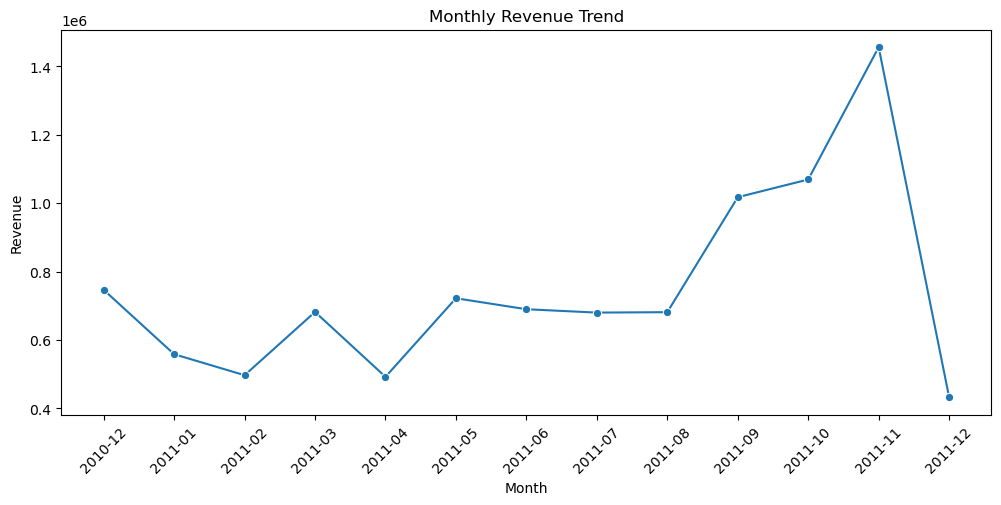

In [9]:
df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str)

monthly = df.groupby('Month')['Revenue'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly, x='Month', y='Revenue', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.show()


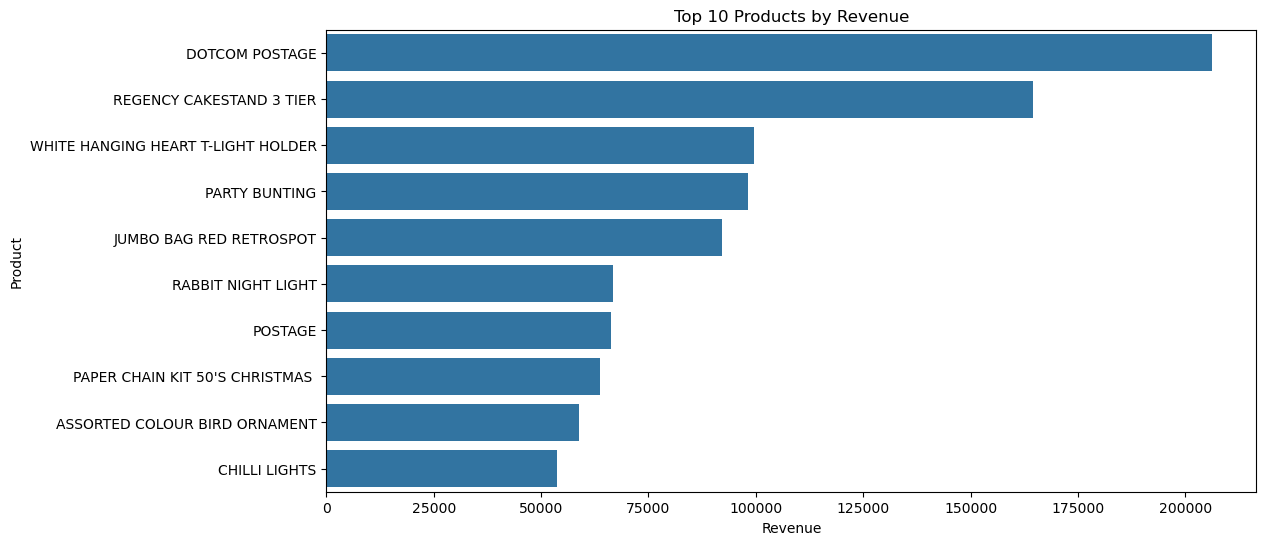

In [10]:
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()


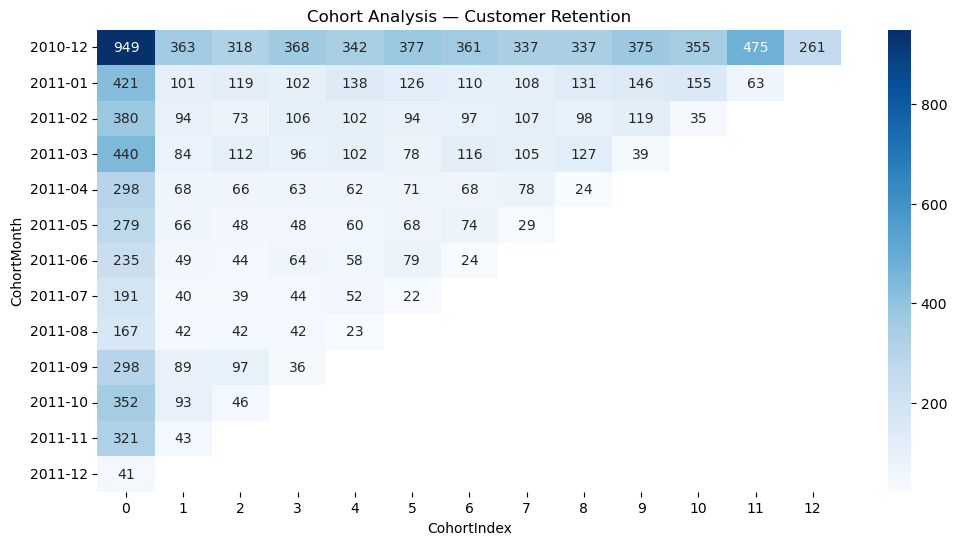

In [11]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

df['CohortIndex'] = (df['InvoiceMonth'].dt.year - df['CohortMonth'].dt.year) * 12 + \
                    (df['InvoiceMonth'].dt.month - df['CohortMonth'].dt.month)

cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

plt.figure(figsize=(12,6))
sns.heatmap(cohort_pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title("Cohort Analysis — Customer Retention")
plt.show()


In [ ]:
Insights Summary
1. Monthly Revenue Trend Insights
Revenue decreases after December 2010, then gradually recovers from March 2011 onward. The mid-year period (April–August 2011) remains stable. A significant revenue surge occurs from September to November 2011, with November being the peak month, reflecting strong seasonal demand. The drop in December 2011 is due to incomplete data.
2. Top Products by Revenue Insights
“DOTCOM POSTAGE” generates the highest revenue, indicating substantial contribution from shipping-related charges. Products such as “Regency Cakestand 3 Tier,” “White Hanging Heart T-Light Holder,” and “Party Bunting” are among the top sellers, showing strong customer interest in home décor and gift items. Overall, a small set of products drives a large share of total revenue.
3. Cohort Analysis – Customer Retention Insights
Most customers make a single purchase, as shown by the steep retention drop from Month 0 to Month 1. The December 2010 cohort shows stronger long-term retention compared to other cohorts. Mid-year cohorts indicate moderate but consistent returning behaviour, while the lower retention in later cohorts is due to limited available months in the dataset. Overall, returning customers form a smaller but valuable segment.
4. Business Recommendations
Retention can be improved through follow-up communication and incentives for second purchases. High-revenue products should be promoted and bundled more strategically. Preparations for increased demand during the final quarter of the year are essential. Developing loyalty programs may convert more one-time buyers into repeat customers.
5. Final Summary
The business experiences strong seasonal revenue peaks and effective customer acquisition but faces limited customer retention after the first month. Improving retention strategies and focusing on top-performing products can significantly enhance customer lifetime value and overall performance.

In [12]:
df.to_csv("dashboard_data.csv", index=False)
print("Dashboard data exported successfully.")


Dashboard data exported successfully.
